## Mathematical aspects of Machine Learning: exercise sheet 8

Lecturers: Péter Koltai, Mattes Mollenhauer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
np.random.seed(1234)

In [ ]:
def generate_ellipsis_data_3d(n_samples=3000):
    """ 
    Generates i.i.d. data x_i ~ U[-1.5, 1.5]^3
    with labels according to whether the points lie in
    an ellipsis described by the condition xQx^T < 1,
    where Q is a randomly generated spsd matrix.
    """

    # generate random spsd matrix Q
    Q = np.random.rand(3,3) - 0.5 * np.ones((3,3))
    Q = 3 * Q.T @ Q

    # random data in [-1.5, 1.5]^3
    X = 3 * (np.random.rand(n_samples, 3) - 0.5 * np.ones((n_samples,3)))

    # assign labels
    Y = (np.diagonal(X @ Q @ X.T) < 1)
    
    return X, Y

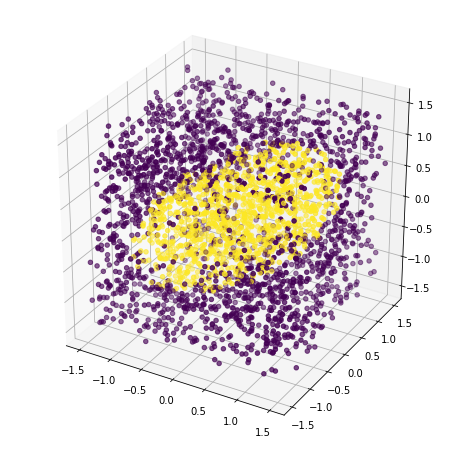

In [ ]:
X, Y = generate_ellipsis_data_3d()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', alpha=.8)
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [ ]:
import itertools

def polynomial_feature_hom(x):
    """
    Maps R^3 to the feature given given by the
    homogeneous polynomial kernel of degree 2.
    """
    # squared dimensions
    squares = [x[i]**2 for i in range(3)]
    # mixed terms w/ rescaling
    mixed_indices = list(itertools.combinations(range(3), 2))
    mixed = [np.sqrt(2) * x[i] * x[j] for i,j in mixed_indices] 
    # concatenate both lists
    return squares + mixed 

In [ ]:
X_poly = np.apply_along_axis(polynomial_feature_hom, 1, X)
print(X_poly.shape)

(3000, 6)


In [ ]:
# load perceptron routine used in sheet 2
from perceptron import perceptron_learning
w, iterate_count, log = perceptron_learning(X, Y)

# display correctly classified data points from each iteration step
print(log)

[12, 12, 13, 13, 3000]
